In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dat=pd.read_excel('C:/YellowBelt/Дефекты пиломатериалов.xlsx','Данные') # Импорт данных
dat.head()

,№п/п,дефекты,квартал
0,1,сучки,первый
1,2,скручивание,первый
2,3,скручивание,первый
3,4,скручивание,первый
4,5,чаша,первый


# Задача №1. Оценить уровень дефектов в компании. Выделить приоритетные направления для работы команды Шесть Сигм.

In [4]:
defects=dat['дефекты'].value_counts() # Подготовка данных

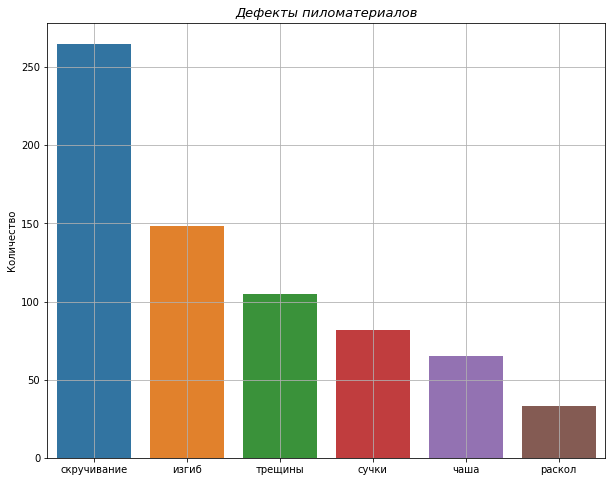

In [5]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
rects=sns.barplot(x=defects.index,y=defects) # bar plot
rects.set_title('Дефекты пиломатериалов',fontsize=13,style='italic') # title of the figure
rects.set_ylabel('Количество') # title of y axes
ax.grid(True) # gridlines

Функция по добавлению названий на столбики

In [6]:
def autolabel(rects):
    for p in rects.patches:
        x=p.get_x()+p.get_width()/2 # координата x
        y=p.get_y()+p.get_height()*1.05 # координата y
        value='{}'.format(int(p.get_height())) # подпись - данные
        ax.text(x,y,value,ha='center') # добавление подписи на график

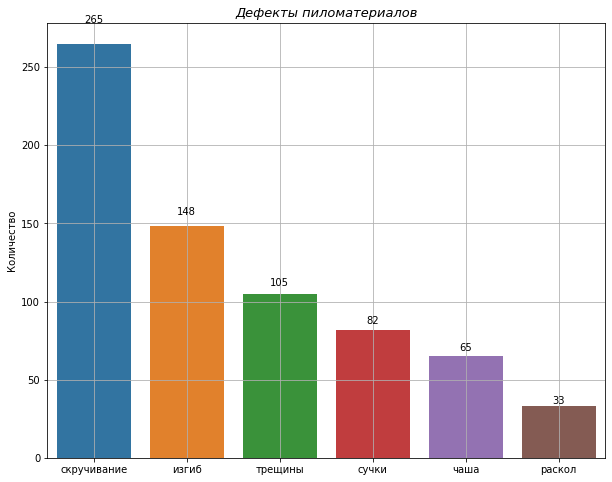

In [10]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
rects=sns.barplot(x=defects.index,y=defects) # bar plot
rects.set_title('Дефекты пиломатериалов',fontsize=13,style='italic') # title of the figure
rects.set_ylabel('Количество') # title of y axes
ax.grid(True) # gridlines
autolabel(rects)

# Задача №2. Сравнить первый и второй кварталы и сделать соответствующие выводы

In [12]:
dat_tab=dat.groupby(['дефекты','квартал']).agg({'дефекты':'count'})
dat_tab.columns=['Количество']
dat_tab=pd.DataFrame(dat_tab)
dat_tab=dat_tab.reset_index()
dat_tab

,дефекты,квартал,Количество
0,изгиб,второй,99
1,изгиб,первый,49
2,раскол,второй,19
3,раскол,первый,14
4,скручивание,второй,132
5,скручивание,первый,133
6,сучки,второй,51
7,сучки,первый,31
8,трещины,второй,53
9,трещины,первый,52


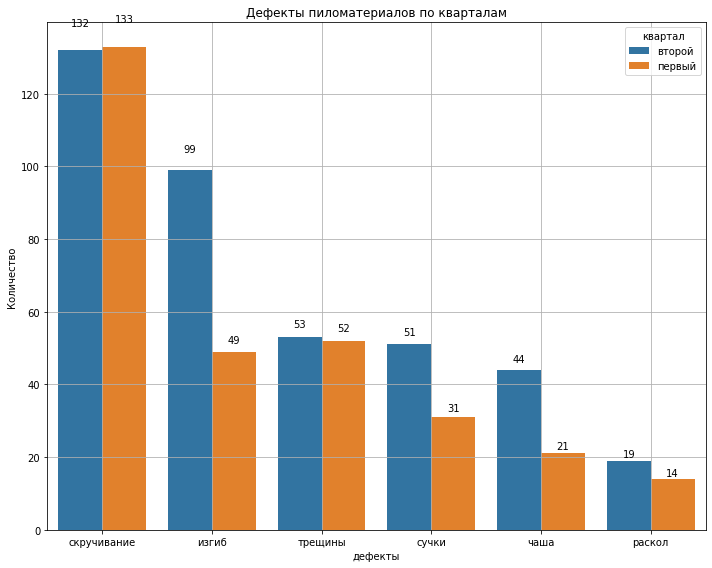

In [13]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
rects=sns.barplot(x='дефекты',y='Количество',data=dat_tab,
                  hue='квартал',order=defects.index
                  )
ax.set_title('Дефекты пиломатериалов по кварталам')
autolabel(rects)
ax.grid()
fig.tight_layout()